# Gravitational Orbits in Cartesian Coordinates 



We consider energy plots and orbital solutions in Cartesian coordinates for the general potential energy

$\begin{align}
   U(r) = \frac{Gm_1m_2}{r}
\end{align}$

Where 
$\begin{align}
    r = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
    \end{align}$
    
    
for different ODE solution algorithms.  The `solve_ivp` function can itself be specified to use different solution methods (with the `method` keyword).  Here we will set it by default to use 'RK23', which is a variant on the Runge-Kutta second-order algorithm.  Second-order in this context means that the accuracy of a calculation will improve by a factor of $10^2 = 100$ if $\Delta t$ is reduced by a factor of ten. 

We will compare it with the crudest algorithm, Euler's method, which is first order, and a second-order algorithm called Leapfrog, which is designed to be precisely <em>time-reversal invariant</em>.  This property guarantees conservation of energy, which is not true of the other algorithms we will consider.

To solve the differential equations for orbits, we have defined the $\mathbf{x}$, $\mathbf{y}$, $d\mathbf{x}/dt$ and $d\mathbf{y}/dt$ an 8 component vector as

$\begin{align}
  \mathbf{x} = \left(\begin{array}{c} x_1(t) \\ \dot x_1(t) \\ x_2(t) \\ \dot x_2(t) \end{array} \right) 
  \qquad
  \frac{d\mathbf{x}}{dt} 
       = \left(\begin{array}{c} \dot x_1(t) \\ \ddot x_1(t) \\ \dot x_2(t) \\ \ddot x_2(t) \end{array} \right) 
\end{align}$

$\begin{align}
  \mathbf{y} = \left(\begin{array}{c} y_1(t) \\ \dot y_1(t) \\ y_2(t) \\ \dot y_2(t) \end{array} \right) 
  \qquad
  \frac{d\mathbf{y}}{dt} 
       = \left(\begin{array}{c} \dot y_1(t) \\ \ddot y_1(t) \\ \dot y_2(t) \\ \ddot y_2(t) \end{array} \right) 
\end{align}$


where we have substituted the differential equations for $\ddot x_1 $, $\ddot x_2$, $\ddot y_1$ and $\ddot y_2 $.

The Euler-Lagrange equation is 
$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot {x}} = \frac{\partial\mathcal L}{\partial{x}}
\end{align}$


Since we are working with Gravitational Orbits we will use the Euler-Lagrange equation in resepect to $x_1$, $x_2$, $y_1$, and $y_2$. 

For $x_1$ :

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot {x_1}} = m_1 \ddot x_1
 \end{align}$
 
  $\begin{align}
 \frac{\partial\mathcal L}{\partial\ x_1} = - \frac { G m_1 m_2 (x_1 - x_2)}{r^3}
\end{align}$

Resulting in $\ddot x_1 $ = $\begin{align} - \frac { G m_2 (x_1 - x_2)}{r^3}
\end{align}$

For $x_2$ :

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot {x_2}} = m_1 \ddot x_2
 \end{align}$
 
  $\begin{align}
 \frac{\partial\mathcal L}{\partial\ x_2} = \frac { G m_1 m_2 (x_1 - x_2)}{r^3}
\end{align}$

Resulting in $\ddot x_2 $ = $\begin{align} \frac { G m_1 (x_1 - x_2)}{r^3}
\end{align}$

For $y_1$ :

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot {x_1}} = m_1 \ddot y_1
 \end{align}$
 
  $\begin{align}
 \frac{\partial\mathcal L}{\partial\ y_1} = - \frac { G m_1 m_2 (y_1 - y_2)}{r^3}
\end{align}$

Resulting in $\ddot y_1 $ = $\begin{align} - \frac { G m_2 (y_1 - y_2)}{r^3}
\end{align}$

For $y_2$ :

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial\dot {y_2}} = m_1 \ddot y_2
 \end{align}$
 
  $\begin{align}
 \frac{\partial\mathcal L}{\partial\ y_2} = - \frac { G m_1 m_2 (y_1 - y_2)}{r^3}
\end{align}$

Resulting in $\ddot y_2 $ = $\begin{align} \frac { G m_1 (y_1 - y_2)}{r^3}
\end{align}$
 
 
The Euler's method is written as a simple prescription to obtain $\mathbf{x}_{i+1}$ 
from $\mathbf{x}_i$, where the subscripts label the elements of the `t_pts` array: 
$\mathbf{x}_{i+1} = \mathbf{x}_i + \left(d\mathbf{x}/dt\right)_i \Delta t$, or, by components:

$\begin{align}
   x_{i+1} &= x_i + \frac{d\mathbf{x}_i[0]}{dt}  \Delta t  \\
   \dot x_{i+1} &= \dot x_{i} + 
  \frac{d\mathbf{x}_i[1]}{dt}  \Delta t \\
\end{align}$

This format was applied to $x_1$ , $x_2$ , $y_1$, and $y_2$. 


The leapfrog method does better by evaluating $\dot x_1$, $\dot x_2$, $\dot y_1$, and $\dot y_2$a t a halfway time step before and after the $x_1$, $x_2$, $y_1$, and $y_2$ evaluation, 
which is both more accurate and incorporates time reversal. The example below is a general representation for any of our various components

$\begin{align}
   \dot x_{i+1/2} &= \dot x_{i} + \frac{d\mathbf{x}_i[1]}{dt}  \Delta t/2 \\
   x_{i+1} &= r_i +  \dot x_{i+1/2}  \Delta t  \\
   \dot x_{i+1} &= \dot x_{i+1/2} + \frac{d\mathbf{x}_{i+1}[1]}{dt}  \Delta t/2 \\
\end{align}$


A third method is the second-order Runge-Kutta algorithm, which we invoke from `solve_ivp` as `RK23`. 
It does not use a fixed time-step as in our "homemade" implementations, so there is not a direct 
comparison, but we can still check if it conserves energy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [3]:
class Orbit:
    """
    Potentials and associated differential equations for central force motion
    with the potential U(r) = k r^n.  Several algorithms for integration of 
    ordinary differential equations are now available. 
    """
    
    def __init__(self, m1=1., m2=1., G=1):
        self.mass1 = m1
        self.mass2 = m2
        self.G = G
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dy/dt d^2y/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 8-component vector with 
            y[0] = x1(t), y[1] = dx1/dt
            y[2] = x2(t), y[3] = dx2/dt 
            y[4] = y1(t), y[5] = dy1/dt
            y[6] = y2(t), y[7] = dy2/dt
        """
        x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = y
        
        r_12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        
        x1_dot_dot = -(self.G * self.mass2 * (x1 - x2))/ (r_12**3)
        
        x2_dot_dot = (self.G * self.mass1 * (x1 - x2))/ (r_12**3)
        
        y1_dot_dot = -(self.G * self.mass2 * (y1 - y2))/ (r_12**3)
        
        y2_dot_dot = (self.G * self.mass1 * (y1 - y2))/ (r_12**3)
        
        return x1_dot, x1_dot_dot, x2_dot, x2_dot_dot, y1_dot, y1_dot_dot, y2_dot, y2_dot_dot
    
                                      
    def solve_ode(self, t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0,
                  method='RK23',
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = solution.y
       
        return x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot
    
    def solve_ode_Euler(self, t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0):
        """
        Solve the ODE given initial conditions with the Euler method.
        The accuracy is determined by the spacing of times in t_pts.
        """
        
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for x1, x2, y1, y2, x1dot, x2dot, y1dot, y2dot, x1_dot_half, 
        #                           x2_dot_half, y1_dot_half, y2_dot_half with zeros
        num_t_pts = len(t_pts)    # length of the array t_pts
        
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        x1_dot[0] = x1_dot_0
        
        x2[0] = x2_0
        x2_dot[0] = x2_dot_0
        
        y1[0] = y1_0
        y1_dot[0] = y1_dot_0
        
        y2[0] = y2_0
        y2_dot[0] = y2_dot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            y = [x1[i], x1_dot[i], x2[i], x2_dot[i], y1[i], y1_dot[i], y2[i], y2_dot[i],]
            
            x1[i+1] = x1[i] + self.dy_dt(t,y)[0] * delta_t
            x1_dot[i+1] = x1_dot[i] + self.dy_dt(t,y)[1] * delta_t 
            
            x2[i+1] = x2[i] + self.dy_dt(t,y)[2] * delta_t
            x2_dot[i+1] = x2_dot[i] + self.dy_dt(t,y)[3] * delta_t
            
            y1[i+1] = y1[i] + self.dy_dt(t,y)[4] * delta_t
            y1_dot[i+1] = y1_dot[i] + self.dy_dt(t,y)[5] * delta_t
            
            y2[i+1] = x1[i] + self.dy_dt(t,y)[6] * delta_t
            y2_dot[i+1] = y2_dot[i] + self.dy_dt(t,y)[7] * delta_t
            
        return x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot
    
    
    def solve_ode_Leapfrog(self, t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for x1, x2, y1, y2, x1dot, x2dot, y1dot, y2dot, x1_dot_half,
        #                           x2_dot_half, y1_dot_half, y2_dot_half with zeros
        
        num_t_pts = len(t_pts)
        
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        
        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        x1_dot[0] = x1_dot_0
        
        x2[0] = x2_0
        x2_dot[0] = x2_dot_0
        
        y1[0] = y1_0
        y1_dot[0] = y1_dot_0
        
        y2[0] = y2_0
        y2_dot[0] = y2_dot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            y = [x1[i], x1_dot[i], x2[i], x2_dot[i], y1[i], y1_dot[i], y2[i], y2_dot[i]]
            
            x1_dot_half[i] = x1_dot[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2_dot[i] + self.dy_dt(t, y)[3] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t

            y1_dot_half[i] = y1_dot[i] + self.dy_dt(t, y)[5] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t

            y2_dot_half[i] = y2_dot[i] + self.dy_dt(t, y)[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            y = [x1[i+1], x1_dot[i], x2[i+1], x2_dot[i], y1[i+1], y1_dot[i], y2[i+1], y2_dot[i]]
            
            x1_dot[i+1] = x1_dot_half[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x2_dot[i+1] = x2_dot_half[i] + self.dy_dt(t, y)[3] * delta_t/2.
            y1_dot[i+1] = y1_dot_half[i] + self.dy_dt(t, y)[5] * delta_t/2.
            y2_dot[i+1] = y2_dot_half[i] + self.dy_dt(t, y)[7] * delta_t/2.
            
               
        return x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot
    
    def energy(self, t_pts, x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot):
        """Evaluate the energy as a function of time"""
        #x1, x1_dot, x2, x2_dot, y1, y1_dot, y2, y2_dot = y
        
        r_12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        
        return 1/2 * self.mass1 * (x1_dot**2 + y1_dot**2) + 1/2 * self.mass2 * (x2_dot**2 + y2_dot**2) \
               - (self.G * self.mass1 * self.mass2) / r_12

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Plotting Orbit in Cartesian Coordinates

In [6]:
# Labels for individual plot axes
x1_pts_vs_y1_pts__labels = (r'$x(t)$', r'$y(t)$')

# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

m1 = 1.
m2 = 1.
G = 10.

#Solve ODE error
#abserr = 1.0e-9
#relerr = 1.0e-8

# Instantiate an orbit
o1 = Orbit(m1=m1, m2=m2, G=G)


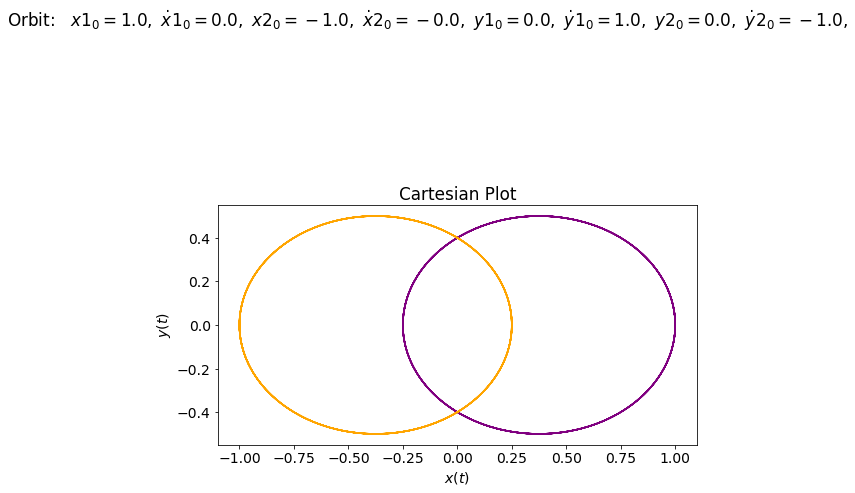

In [7]:
# Initial conditions

x1_0 = 1. 
x1_dot_0 = 0.

x2_0 = -(m1/m2)*x1_0
x2_dot_0 = -(m1/m2)*x1_dot_0

y1_0 = 0. 
y1_dot_0 = 1.

y2_0 = 0-(m1/m2)*y1_0 
y2_dot_0 = -(m1/m2)*y1_dot_0

x1_pts, x1_dot_pts, x2_pts, x2_dot_pts, y1_pts, y1_dot_pts, y2_pts, y2_dot_pts \
    = o1.solve_ode(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)
x1_pts_Euler, x1_dot_pts_Euler, x2_pts_Euler, x2_dot_pts_Euler, y1_pts_Euler, y1_dot_pts_Euler, y2_pts_Euler, y2_dot_pts_Euler \
    = o1.solve_ode_Euler(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)
x1_pts_LF, x1_dot_pts_LF, x2_pts_LF, x2_dot_pts_LF, y1_pts_LF, y1_dot_pts_LF, y2_pts_LF, y2_dot_pts_LF \
    = o1.solve_ode_Leapfrog(t_pts, x1_0, x1_dot_0, x2_0, x2_dot_0, y1_0, y1_dot_0, y2_0, y2_dot_0)

fig = plt.figure(figsize=(8,8))

overall_title = 'Orbit:  ' + \
                rf' $x1_0 = {x1_0:.1f},$' + \
                rf' $\dot x1_0 = {x1_dot_0:.1f},$' + \
                rf' $x2_0 = {x2_0:.1f},$' + \
                rf' $\dot x2_0 = {x2_dot_0:.1f},$' + \
                rf' $y1_0 = {y1_0:.1f},$' + \
                rf' $\dot y1_0 = {y1_dot_0:.1f},$' + \
                rf' $y2_0 = {y2_0:.1f},$' + \
                rf' $\dot y2_0 = {y2_dot_0:.1f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')

#first plot: x1_pts plot
#ax_a = fig.add_subplot(1,2,1)
ax_a = fig.add_subplot(111,aspect=1.0)
ax_a.set_aspect('equal')

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x1_pts[start : stop], y1_pts[start : stop], 
            axis_labels=x1_pts_vs_y1_pts__labels, 
            color='purple',
            label=None, 
            title=r'Cartesian Plot', 
            ax=ax_a)  

# second plot: x2_pts plot                 

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x2_pts[start : stop], y2_pts[start : stop], 
            color='orange',
            label=None, 
            title=r'Cartesian Plot', 
            ax=ax_a)   

fig.tight_layout()
fig.savefig('Gravitational_Orbits.png', bbox_inches='tight') 

## Leapfrog Method and Conservation of Energy using the SciPy ODE Solvers

In [8]:
E_tot_pts = o1.energy(t_pts, x1_pts, x1_dot_pts, x2_pts, x2_dot_pts, y1_pts, y1_dot_pts, y2_pts, y2_dot_pts)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

E_tot_pts_Euler = o1.energy(t_pts, x1_pts_Euler, x1_dot_pts_Euler, x2_pts_Euler, x2_dot_pts_Euler, y1_pts_Euler, y1_dot_pts_Euler, y2_pts_Euler, y2_dot_pts_Euler)
E_tot_0_Euler = E_tot_pts_Euler[0]
E_tot_rel_pts_Euler = np.abs((E_tot_pts_Euler - E_tot_0_Euler)/E_tot_0_Euler)

E_tot_pts_LF = o1.energy(t_pts, x1_pts_LF, x1_dot_pts_LF, x2_pts_LF, x2_dot_pts_LF, y1_pts_LF, y1_dot_pts_LF, y2_pts_LF, y2_dot_pts_LF)
E_tot_0_LF = E_tot_pts_LF[0]
E_tot_rel_pts_LF = np.abs((E_tot_pts_LF - E_tot_0_LF)/E_tot_0_LF)

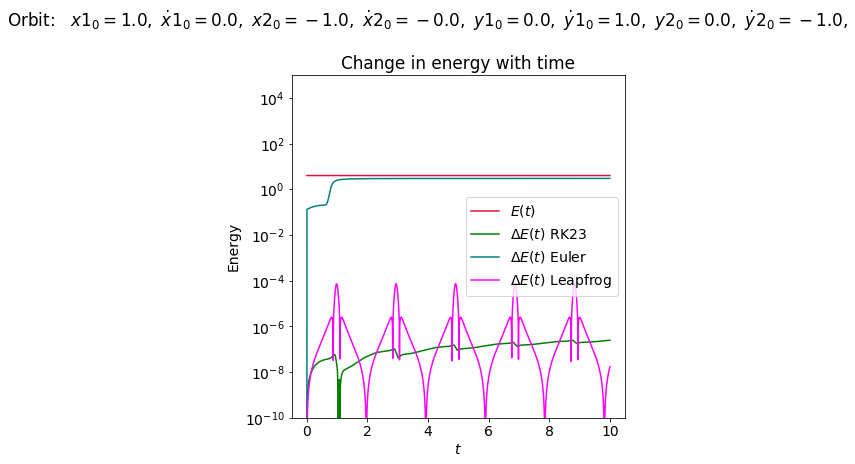

In [9]:
fig_1= plt.figure(figsize=(6,6))

overall_title = 'Orbit:  ' + \
                rf' $x1_0 = {x1_0:.1f},$' + \
                rf' $\dot x1_0 = {x1_dot_0:.1f},$' + \
                rf' $x2_0 = {x2_0:.1f},$' + \
                rf' $\dot x2_0 = {x2_dot_0:.1f},$' + \
                rf' $y1_0 = {y1_0:.1f},$' + \
                rf' $\dot y1_0 = {y1_dot_0:.1f},$' + \
                rf' $y2_0 = {y2_0:.1f},$' + \
                rf' $\dot y2_0 = {y2_dot_0:.1f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig_1.suptitle(overall_title, va='baseline')

ax_1a = fig_1.add_subplot(1,1,1)
ax_1a.semilogy(t_pts, np.abs(E_tot_pts), color='crimson', label=r'$E(t)$')
ax_1a.semilogy(t_pts, E_tot_rel_pts, 
               color='green', label=r'$\Delta E(t)$ RK23')
ax_1a.semilogy(t_pts, E_tot_rel_pts_Euler, 
               color='teal', label=r'$\Delta E(t)$ Euler')
ax_1a.semilogy(t_pts, E_tot_rel_pts_LF, 
               color='magenta', label=r'$\Delta E(t)$ Leapfrog')
ax_1a.set_ylim(1.e-10, 1.e+5)    # (1.e-12, 5)
ax_1a.set_xlabel(r'$t$')
ax_1a.set_ylabel(r'Energy')
ax_1a.set_title('Change in energy with time')
ax_1a.legend()

fig_1.tight_layout()
fig_1.savefig('Leapfrog_energy_test_1.png', dpi=200)

## Gravitaional Orbit Animation

In [131]:
from matplotlib import animation, rc
from IPython.display import HTML

In [132]:
def u_0_orbit(x1_pts, x2_pts, height=1., width=1.):
    """Returns a triangular wave of amplitude height and width 2*width.  
    """
    y1_pts = np.zeros(len(x1_pts))  # set the y array to all zeros
    y2_pts = np.zeros(len(x2_pts))
    for i, x in enumerate(x1_pts,x2_pts):
        if x < width and x >= 0.:
            y1_pts[i] = -(height/width) * x + height
            y2_pts[i] = -(height/width) * x + height
        elif x < 0 and x >= -width:
            y1_pts[i] = (height/width) * x + height
            y2_pts[i] = (height/width) * x + height
        else:
            pass   # do nothing (everything else is zero already)
    
    return y1_pts, y2_pts


In [133]:
def u_orbit(x1_pts, x2_pts, t, c_wave=1., height=1., width=1.):
    """Returns the orbit at time t.
    """
    y1_pts = u_0_orbit(x1_pts - c_wave * t) / 2. +  u_0_orbit(x1_pts + c_wave * t) / 2.
    
    y2_pts = u_0_orbit(x2_pts - c_wave * t) / 2. + u_0_orbit(x2_pts + c_wave * t) / 2.
    
    return y1_pts, y2_pts

In [134]:
# Set up the t mesh for the animation.  The maximum value of t shown in
#  the movie will be t_min + delta_t * frame_number
t_min = -5.   # You can make this negative to see what happens before t=0!
t_max = 15.
delta_t =0.1
t_pts = np.arange(t_min, t_max, delta_t)

x_min = -5.
x_max = +5.
delta_x = 0.01
x_pts = np.arange(x_min, x_max, delta_x)

height = 1.
width = 1.
c_wave = 1.


In [139]:
%%capture

fig_anim = plt.figure(figsize=(6,2), num='Gravitaional Orbit')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
gap = 0.1
ax_anim.set_ylim(-gap, height + gap)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.

line_anim, = ax_anim.plot(x1_pts, x2_pts,
                          u_orbit(x1_pts, x2_pts, t_min, c_wave, height, width), 
                          color='purple', lw=2)

line_anim, = ax_anim.plot(y1_pts, y2_pts,
                          u_orbit(y1_pts, y2_pts, t_min, c_wave, height, width), 
                          color='pink', lw=2)
fig_anim.tight_layout()


TypeError: u_0_orbit() missing 1 required positional argument: 'x2_pts'

In [136]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y1_pts = u_orbit(x1_pts, t, c_wave, height, width) 
    y2_pts = u_orbit(x2_pts, t, c_wave, height, width)

    line_anim.set_data(x1_pts, x2_pts, y1_pts, y2_pts)  # overwrite line_anim with new points
    return (line_anim,)   # this is needed for blit=True to work

In [137]:
frame_interval = 40.  # time between frames
frame_number = 100    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

Traceback (most recent call last):
  File "/Users/Tamia/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/Users/Tamia/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/Users/Tamia/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/Users/Tamia/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1762, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-136-4d7403be8218>", line 7, in animate_wave
    y1_pts = u_orbit(x1_pts, t, c_wave, height, width)
  File "<ipython-input-133-7c8497d937cb>", line 4, in u_orbit
    y1_pts = u_0_orbit(x1_pts - c_wave * t) / 2. +  u_0_orbit(x1_pts + c_wave * t) / 2.
TypeError: u_0_orbit() missing 1 required positional argument: 'x2_pts'


In [17]:
HTML(anim.to_jshtml())      # animate using javascript

TypeError: u_orbit() missing 1 required positional argument: 't'